###### This procedure attempts to contribute to data entry tasks. The code shown allows the extraction of data in lists and dictionaries, Objects that are easy to use in machine learning to obtain regression models.

##### In this file we show how read data fliles .mat. Data used published in: B. Saha and K. Goebel (2007). “Battery Data Set”, NASA Prognostics Data Repository, NASA Ames Research Center, Moffett Field, CA

In [94]:
import numpy as np 
import scipy.io #This is the library to read (or load matlab files)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Here, we can realize that B05 - B018 are dictionaries.
B05 = scipy.io.loadmat("B0005.mat")
B06 = scipy.io.loadmat("B0006.mat")
B07 = scipy.io.loadmat("B0007.mat")
B018 = scipy.io.loadmat("B0018.mat")

In [95]:

#Here the cycle number and capacity will be stored in the corresponding lists. 
#All this in the battery discharge process.
Cycle_05 = []
Capacity_05 = []
j = 0
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):
  if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "discharge":
    Capacity_05.append(B05["B0005"]["cycle"][0][0][0][i]["data"]["Capacity"][0][0][0][0])
    j=j+1
    Cycle_05.append(j)

In [96]:
#Now we extract the current, voltage and temperature data into the displayed ditionaries.
#All this in the battery discharge process.
dict_V_m = {}     #measured voltage
dict_Time = {}    #Time
dict_Curr_m = {}  #measured current
dict_Curr_l = {}  #measured current
dict_V_l ={}      #Voltage
dict_Temp_m = {}  # Temperature

di = -1 
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):    
    if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "discharge":
        di = di+1
        dict_V_m[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Voltage_measured"][0][0][0]
        dict_V_l[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Voltage_load"][0][0][0]
        dict_Time[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Time"][0][0][0]
        dict_Curr_m[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Current_measured"][0][0][0]    
        dict_Curr_l[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Current_load"][0][0][0]
        dict_Temp_m[di] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Temperature_measured"][0][0][0]

In [97]:
#Same way we extract the current, voltage and temperature data into the displayed ditionaries
#. But to discharge process.
dict_V_mC = {}
dict_TimeC = {}
dict_Curr_mC = {}
dict_Curr_lC = {}
dict_V_lC ={}
dict_Temp_mC = {}

dci = -1 
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):    
    if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "charge":
        dci = dci+1
        dict_V_mC[dci] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Voltage_measured"][0][0][0]
        dict_V_lC[dci] = B05["B0005"]["cycle"][0][0][0][i]["data"]['Voltage_charge'][0][0][0]
        dict_TimeC[dci] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Time"][0][0][0]
        dict_Curr_mC[dci] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Current_measured"][0][0][0]    
        dict_Curr_lC[dci] = B05["B0005"]["cycle"][0][0][0][i]["data"]['Current_charge'][0][0][0]
        dict_Temp_mC[dci] = B05["B0005"]["cycle"][0][0][0][i]["data"]["Temperature_measured"][0][0][0]

Text(0, 0.5, 'Voltage (V)')

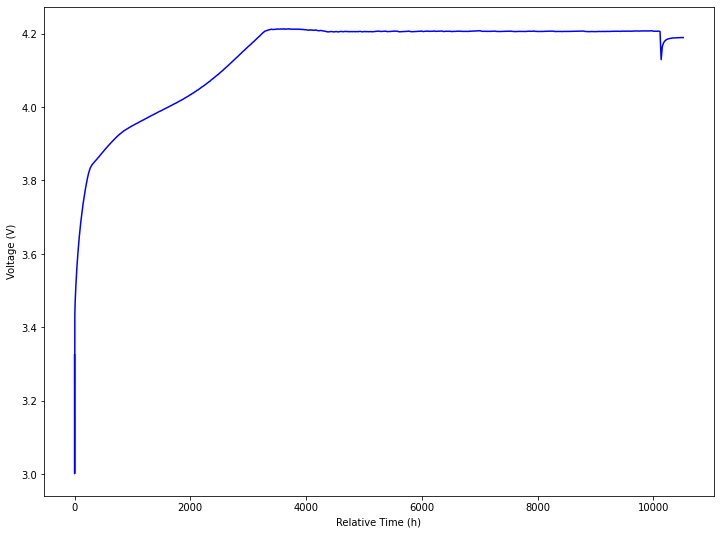

In [98]:
figure(num=None, figsize=(12, 9))
plt.plot(dict_TimeC[1], dict_V_mC[1], "b" )
plt.xlabel("Relative Time (h)")
plt.ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

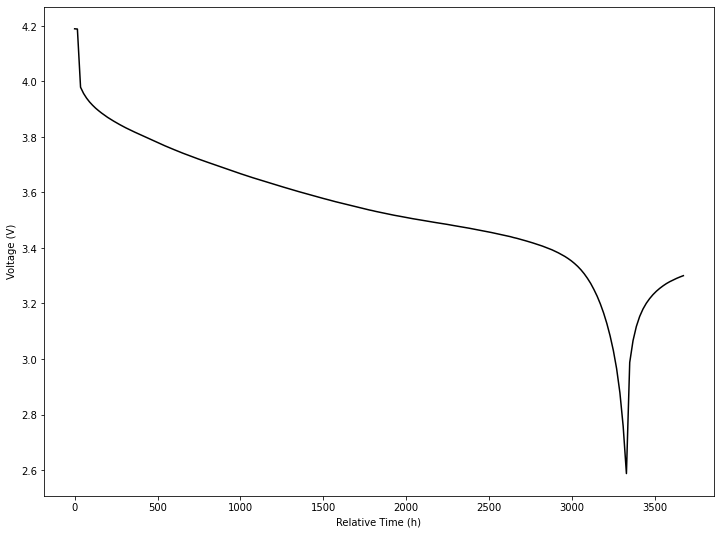

In [99]:
figure(num=None, figsize=(12, 9))
plt.plot(dict_Time[1], dict_V_m[1], "k", )

plt.xlabel("Relative Time (h)")
plt.ylabel("Voltage (V)")
   

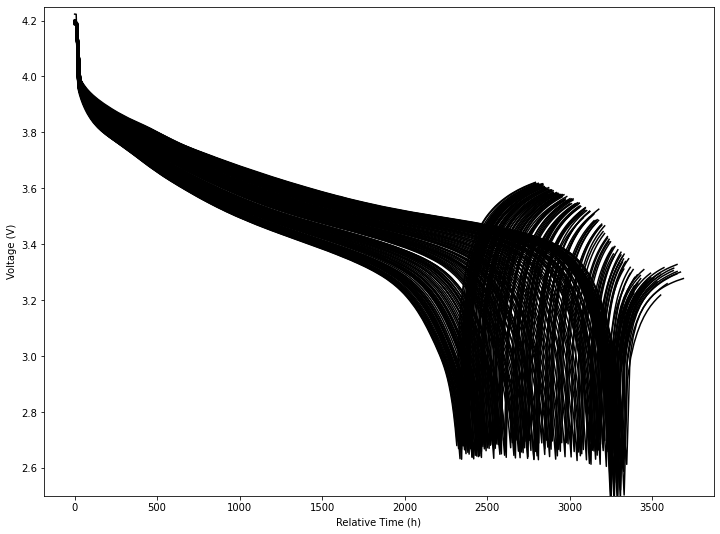

In [100]:
figure(num=None, figsize=(12, 9))
for i in range(len(dict_Time)):
    plt.plot(dict_Time[i], dict_V_m[i],"k" )
    #plt.plot(dict_TimeC[i], dict_V_mC[i],"k" )

plt.xlabel("Relative Time (h)")
plt.ylabel("Voltage (V)")
plt.ylim(2.5,4.25)
plt.show()

Text(0, 0.5, 'Measured Capacity (Ah)')

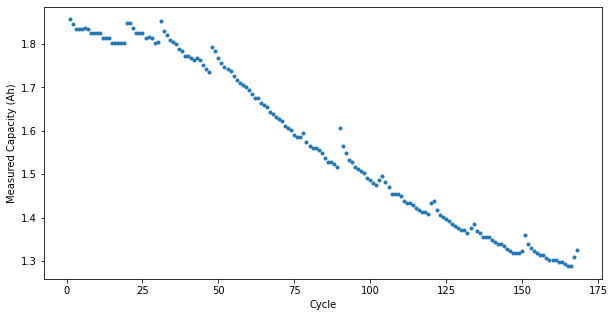

In [101]:
#In this section we extract the capacity data for each battery cycle
Cycle =[]
Capacity = []
j=0
for i in range(len(B05["B0005"]["cycle"][0][0][0]["type"])):
    
    if B05["B0005"]["cycle"][0][0][0]["type"][i][0] == "discharge" :
        
        Capacity.append(B05["B0005"]["cycle"][0][0][0][i]["data"]["Capacity"][0][0][0][0])
               
        j = j+1
        Cycle.append(j)
     
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.plot(Cycle, Capacity, 'o', ms=3)
ax.set_xlabel("Cycle") 
ax.set_ylabel("Measured Capacity (Ah)") 

